In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
from wordcloud import WordCloud, STOPWORDS

In [3]:
data = pd.read_csv('Data/winemag-data-130k-v2.csv.zip', compression='zip', low_memory=False)

In [4]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
data['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [7]:
data.shape

(129971, 14)

In [8]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['counts'] = df.count().values
    summary['Missing'] = df.isnull().sum().values
    summary['missing_ration'] = (df.isnull().sum().values / df.shape[0]) * 100
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [9]:
resumetable(data)

Dataset Shape: (129971, 14)


,Name,dtypes,counts,Missing,missing_ration,Uniques,First Value,Second Value,Third Value
0,Unnamed: 0,int64,129971,0,0.000000,129971,0,1,2
1,country,object,129908,63,0.048472,43,Italy,Portugal,US
2,description,object,129971,0,0.000000,119955,"Aromas include tropical fruit, broom, brimston...","This is ripe and fruity, a wine that is smooth...","Tart and snappy, the flavors of lime flesh and..."
3,designation,object,92506,37465,28.825661,37979,Vulkà Bianco,Avidagos,NaN
4,points,int64,129971,0,0.000000,21,87,87,87
5,price,float64,120975,8996,6.921544,390,NaN,15.0,14.0
6,province,object,129908,63,0.048472,425,Sicily & Sardinia,Douro,Oregon
7,region_1,object,108724,21247,16.347493,1229,Etna,NaN,Willamette Valley
8,region_2,object,50511,79460,61.136715,17,NaN,NaN,Willamette Valley
9,taster_name,object,103727,26244,20.192197,19,Kerin O’Keefe,Roger Voss,Paul Gregutt


In [10]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


# Analysis of description 

In [11]:
text = " ".join(review for review in data.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


In [12]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white", 
                      max_words=300, 
                      max_font_size = 200, 
                      width=1000, 
                      height = 800).generate(text)

# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'STOPWORDS' is not defined

# Analysis of price

C:\Users\warri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


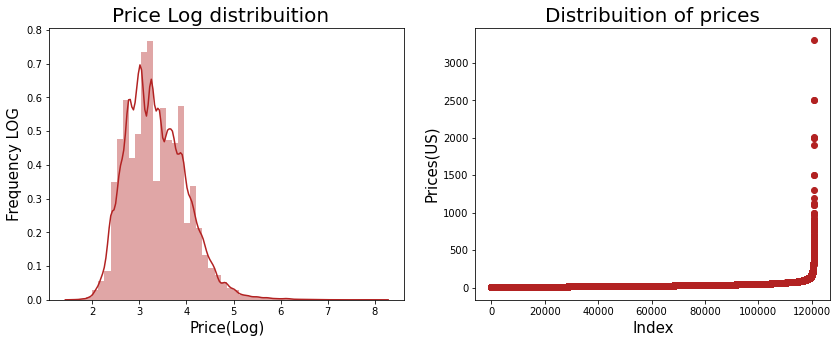

In [ ]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(data['price'].dropna()+1),
                  color='firebrick')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(data.shape[0]), np.sort(data.price.values), 
            color='firebrick')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

distribution of prices might be normally distributed, <br>
most prices are definitely below 200

C:\Users\warri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


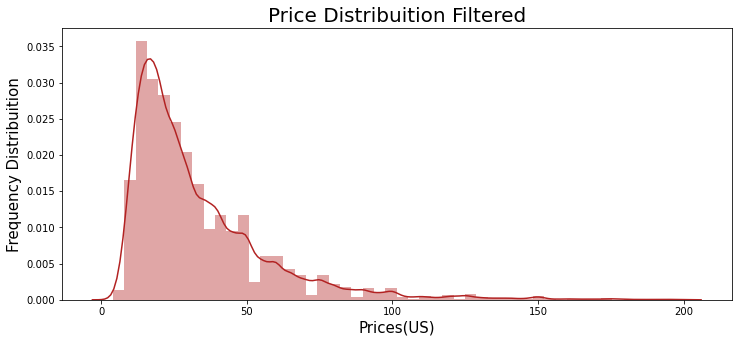

In [ ]:
plt.figure(figsize=(12,5))

p = sns.distplot(data[data['price'] < 200]['price'], color='firebrick')
p.set_title("Price Distribuition Filtered", fontsize=20)
p.set_xlabel("Prices(US)", fontsize=15)
p.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

most wines have prices under 100

# Analysis of countries

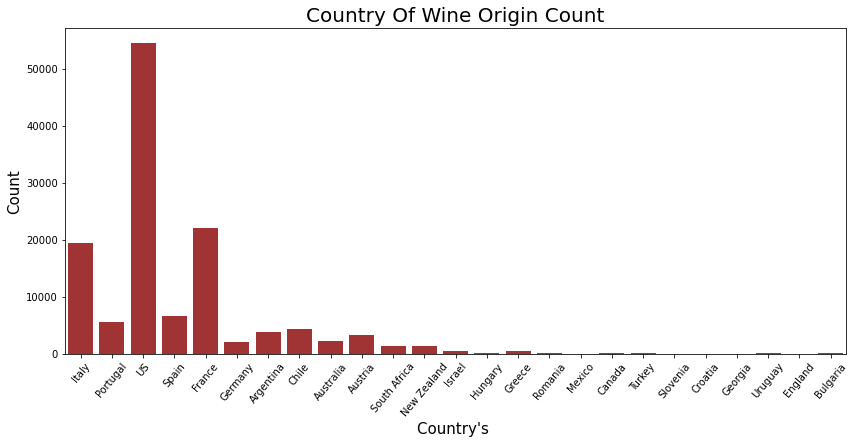

In [ ]:

plt.figure(figsize=(14,6))

country = data.country.value_counts()[:25]

c = sns.countplot(x='country', 
                  data=data[data.country.isin(country.index.values)],
                 color='firebrick')
c.set_title("Country Of Wine Origin Count", fontsize=20)
c.set_xlabel("Country's ", fontsize=15)
c.set_ylabel("Count", fontsize=15)
c.set_xticklabels(c.get_xticklabels(),rotation=50)

plt.show()

big producer in this dataset: US, then italy, france etc.. 

### most expensive and least expensive prices - countrywise

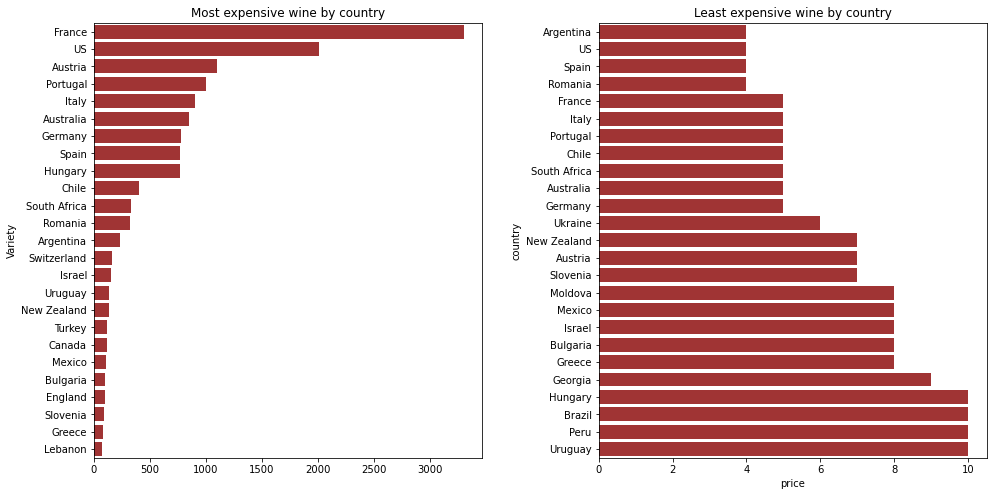

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = data.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:25]
sns.barplot(x = cnt['price'], y = cnt.index, color='firebrick' ,ax=ax1)
ax1.set_title('Most expensive wine by country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = data.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:25]
sns.barplot(x = cnt['price'], y = cnt.index, color = 'firebrick' ,ax=ax2)
ax2.set_title('Least expensive wine by country')
plt.subplots_adjust(wspace=0.3)

### distribution of price within the biggest 25 producers:

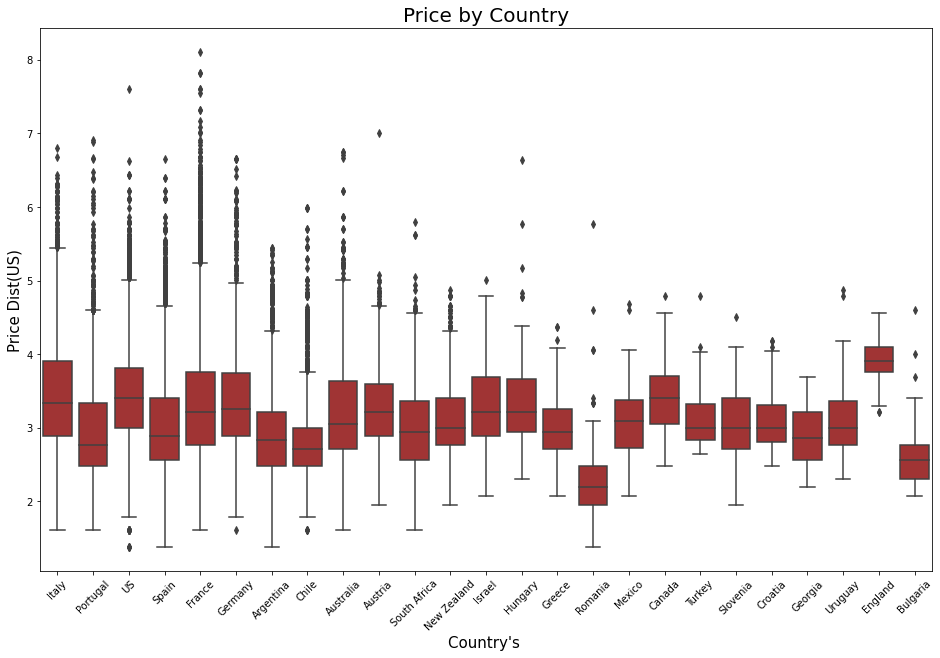

In [ ]:
data['price_log'] = np.log(data['price'])
plt.figure(figsize=(16,10))

pbyc = sns.boxplot(x='country', y='price_log',
                  data=data.loc[(data.country.isin(country.index.values))],
                 color='firebrick')
pbyc.set_title("Price by Country", fontsize=20)
pbyc.set_xlabel("Country's ", fontsize=15)
pbyc.set_ylabel("Price Dist(US)", fontsize=15)
pbyc.set_xticklabels(pbyc.get_xticklabels(),rotation=45)

plt.show()

### distribution of points within the biggest 25 producers:

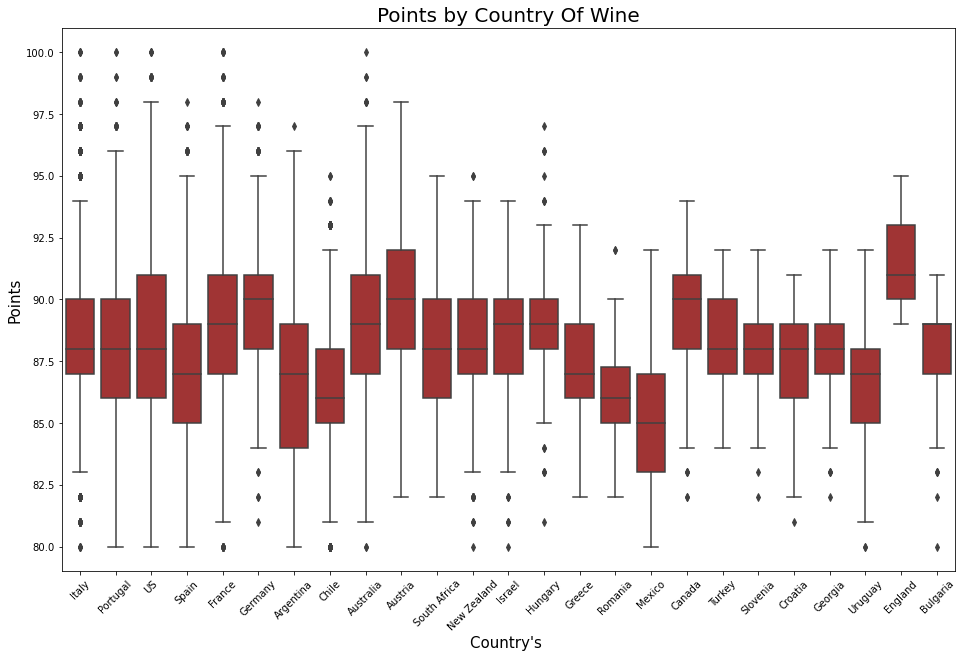

In [ ]:
plt.figure(figsize=(16,10))
pointsbyc = sns.boxplot(x='country', y='points',
                   data=data[data.country.isin(country.index.values)],
                 color='firebrick')
pointsbyc.set_title("Points by Country Of Wine", fontsize=20)
pointsbyc.set_xlabel("Country's ", fontsize=15)
pointsbyc.set_ylabel("Points", fontsize=15)
pointsbyc.set_xticklabels(pointsbyc.get_xticklabels(),rotation=45)

plt.show()

### Quality: Top wine by variety (type of grapes used to make the wine)

Variety of wines 707


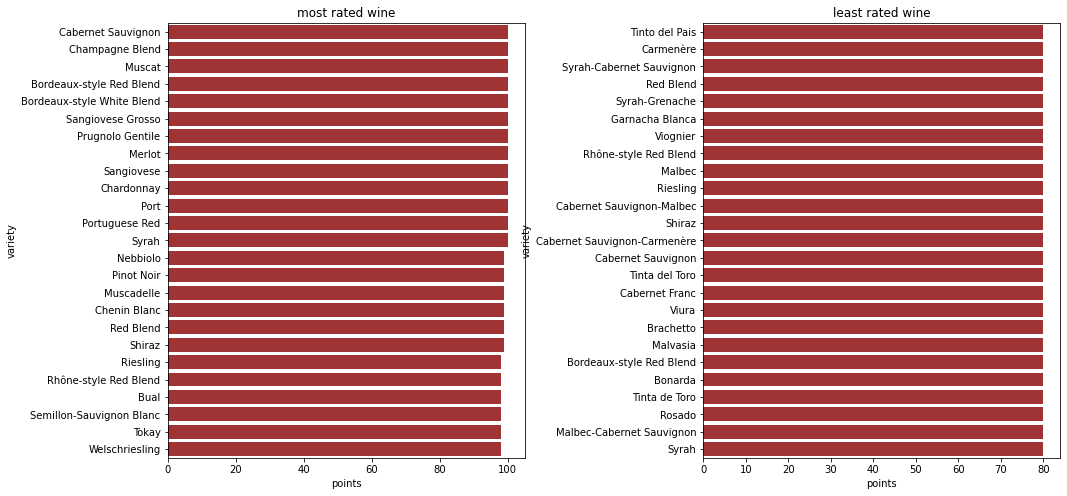

In [ ]:
print('Variety of wines', data['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()


q = data.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:25]
sns.barplot(x = q['points'], y = q.index, color = 'firebrick',ax=ax1)
ax1.set_title('most rated wine')

q = data.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:25]
sns.barplot(x = q['points'], y = q.index, color= 'firebrick', ax=ax2)
ax2.set_title('least rated wine')

plt.subplots_adjust(wspace=0.5)
